# STAT3612 Data Mining (2018-19 Semester 2)<a class="anchor" id="top">
## Tutorial Class 3 Generalized Linear Models (GLM)
### _Prepared by Dr. Gilbert Lui_

### Table of Contents:


* [Introduction to Genearlized Linear Model](#glm)
    * [Explanatory Data Analysis]()
    * [Standardization]()

<div style="text-align: right"><a href="#top">Back to the top</a></div>

## Why Generalized Linear Models (GLMs)?

- In classical linear models, target variable Y is explained by a linear combination of input variables $X_1$, $X_2$, ..., $X_k$. In particular,

\begin{align}
Y &= \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_k X_k + \varepsilon
\end{align}

where $\varepsilon$ denotes the model error which cannot be explained by the linear combination of $X$'s.

However, the **target variable Y should be continuous** in this classical linear model. GLMs are considered to extend this classical linear model to handle various types of target variable.

<div style="text-align: right"><a href="#top">Back to the top</a></div>

## What are GLMs?

Basically, GLMs consist of three components:
1. Random component $Y$ has a probability distribution in the exponential family.
2. Systematic component $\eta=\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_k X_k$.
3. Link function $g(\cdot)$ relates both random component and systematic component by
\begin{align}
g(\mu) &= \eta,
\end{align}
where $\mu=E(Y)$ and $g(\cdot)$ is a monotonic differentiable function.

Simply speaking, in GLM, the transformed mean of $Y$ is explained by the linear combination of $X$'s.

<div style="text-align: right"><a href="#top">Back to the top</a></div>

## Special cases of GLMs

### A. Linear regression
Three compnoents of GLM:
1. $Y$ is normally distributed.
2. $\eta=\beta_0 + \sum_{i=1}^k \beta_i X_i$.
3. $g(\mu)=\mu$ where $\mu=E(Y)$.

Based on the above settings,

\begin{align}
\mu = \beta_0 + \sum_{i=1}^k \beta_i X_i.
\end{align}

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### B. Logistic regression
1. $Y$ is binary (e.g. {0,1}).
2. $\eta=\beta_0 + \sum_{i=1}^k \beta_i X_i$.
3. $g(\mu)=\log \left ( \dfrac{\mu}{1-\mu} \right )$ where $\mu=E(Y)=P(Y=1)$.

Based on the above settings,
\begin{eqnarray*}
\mu &= P(Y=1) &=& \dfrac{\exp(\beta_0 + \sum_{i=1}^k \beta_i X_i)}{1+\exp(\beta_0 + \sum_{i=1}^k \beta_i X_i)}. \\
\mbox{ and }1-\mu &= P(Y=0) &=& \dfrac{1}{1+\exp(\beta_0 + \sum_{i=1}^k \beta_i X_i)}. \\
\end{eqnarray*}

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### C. Softmax regression
1. $Y=1,2,...,K$ is multinomial.
2. $\eta_j=\beta_{j0} + \sum_{i=1}^k \beta_{ji} X_i$ for $j=1,2,...,K$.
3. The link functions are $\log \dfrac{\mu_j}{C} = \eta_j$, $C\ne 0$ where $\mu_j=P(Y=j)$ for $j=1,2,...,K$.

Based on the above settings,
\begin{eqnarray*}
\mu_j = P(Y=j) &=& \dfrac{\exp(\beta_{j0} + \sum_{i=1}^k \beta_{ji} X_i)}{\sum_{\ell=1}^K \exp(\beta_0 + \sum_{i=1}^k \beta_{\ell i} X_i)} \mbox{ for } j=1,2,...,K.
\end{eqnarray*}

Note that
\begin{align}
\sum_{j=1}^K \mu_j = 1.
\end{align}

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Example of Linear Regression

The dataset of diabetes contains 442 recrods of diabetes patients. In the data file, the first column stores the values of a response variable which is indeed a quantitative measure of disease progression one year after baseline and the remaining columns are the age, sex, body mass index, average blood pressure, and six blood serum measurements. All the observations are stored in the data file diabetes.csv (Note that this file has no header information).

As demonstrated in the lecture, the `statsmodels` package can generate the standard errors of parameter estimates and diagnostic statistics more easily. In the following, the `scikit-learn` package will be used for illustration purpose.

In [1]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy as sc
import scipy.stats

diab = pd.read_csv("diabetes.csv", 
                   header=None, 
                   names=['target', 'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
varlist = list(diab.columns)
y = diab[varlist[0]]
x = diab[varlist[1:]]

lm = LinearRegression()
res = lm.fit(x,y)
n, k = x.shape
# bhat estimate
bhat = np.append(lm.intercept_, lm.coef_)
yhat = np.matrix(lm.predict(x)).T
# change x and y to np.array
x = np.hstack((np.ones((n,1)),np.matrix(x)))
y = np.matrix(y).T
# degree of freedom
df = float(n-k-1)
# estimated error variance
sse = np.sum(np.square(yhat-y),axis=0)
sig2 = sse/df
bvar = np.squeeze(np.asarray(sig2*sc.linalg.inv(x.T*x).diagonal()))
# standard error of bhat
bse = np.sqrt(bvar)
# t-statistics of bhat
bTstat = np.zeros(len(bse))
for i in range(len(bse)):
    bTstat[i] = bhat[i]/bse[i]
# p-value of bhat
bPVal = 1 - scipy.stats.t.cdf(abs(bTstat),df)

vlist = ['Intercept']
for i in varlist[1:]:
    vlist.append(i)
dfout = pd.DataFrame({'Variable': vlist,
                      'Estimate': bhat,
                      'S.E.': bse,
                      't-ratio': bTstat,
                      'p-value': bPVal})
new_order = [2,0,1,4,3]
dfout = dfout[dfout.columns[new_order]]
# show the estimation result of regression coefficients
print(dfout)
rsq = sklearn.metrics.r2_score(y, yhat)
adjrsq = 1-(1-rsq)*(n-1)/df
fstat = rsq / (1-rsq) * df / k
print("R-Squared =", rsq)
print("Adj. R-Squared =", adjrsq)
print("F-Statistics =", fstat)

          S.E.   Variable    Estimate       p-value    t-ratio
0     2.575719  Intercept  152.144861  0.000000e+00  59.068897
1    59.744502        age  -10.023929  4.334175e-01  -0.167780
2    61.235668        sex -239.918384  5.191171e-05  -3.917952
3    66.520897        bmi  519.615096  2.176037e-14   7.811306
4    65.416914         bp  324.530793  5.056501e-07   4.960962
5   416.385890         s1 -795.181921  2.841619e-02  -1.909724
6   338.944878         s2  478.939415  7.918427e-02   1.413030
7   212.395702         s3  102.441665  3.149135e-01   0.482315
8   161.592143         s4  177.964285  1.356865e-01   1.101318
9   171.812977         s5  752.487514  7.469098e-06   4.379690
10   65.976527         s6   67.351445  1.539516e-01   1.020839
R-Squared = 0.5177997409682407
Adj. R-Squared = 0.5066117999234203
F-Statistics = 46.28195115561165


<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Model diagnostics

Text(0.5, 1.0, 'Residual Plot')

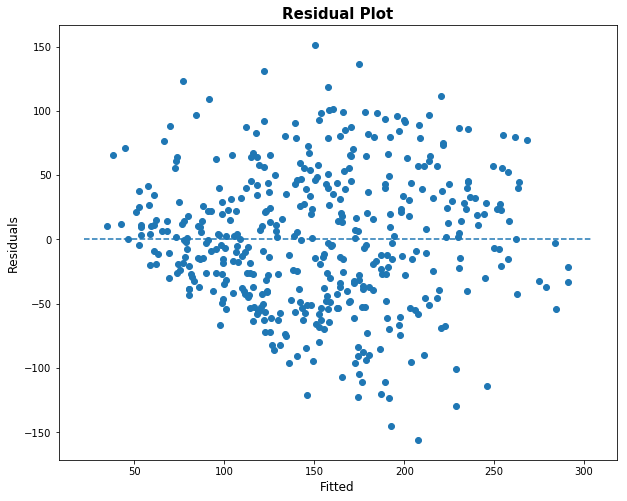

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

res = np.squeeze(np.asarray(y)) - np.squeeze(np.asarray(yhat))
yplot = np.squeeze(np.asarray(yhat))
plt.figure(figsize=(10, 8))
plt.scatter(yplot, res)
plt.plot(plt.xlim(), [0,0], linestyle='dashed')
plt.xlabel('Fitted', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot',fontsize=15, fontweight="bold")

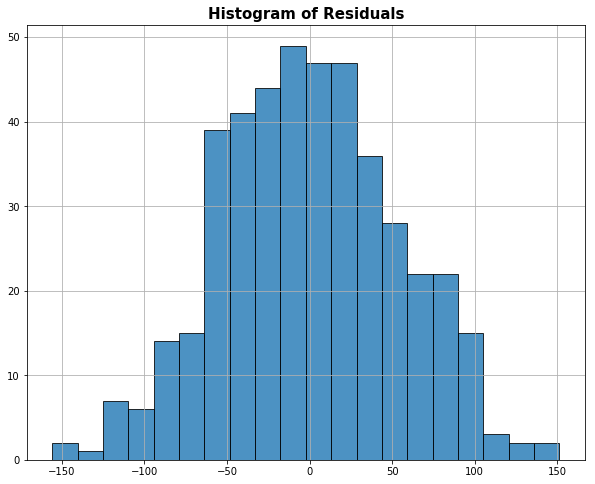

In [3]:
plt.figure(figsize=(10, 8))
plt.hist(res, bins=20, edgecolor='k', alpha=0.8)
plt.title('Histogram of Residuals',fontsize=15, fontweight="bold")
plt.grid(True)

Text(0.5, 1.0, 'Influence Plot')

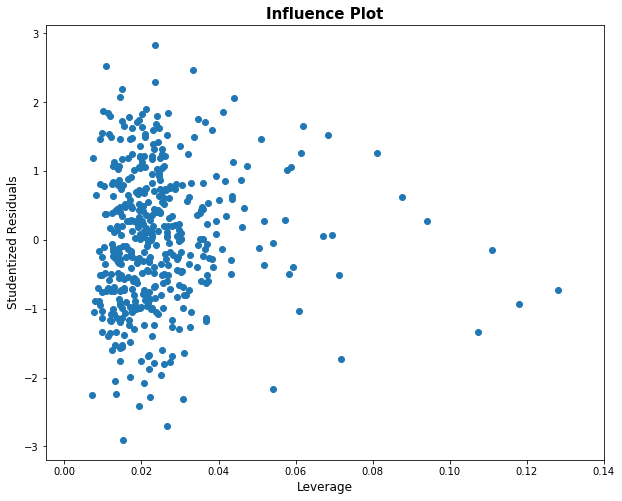

In [4]:
# compute leverage for outlier observations
Hmat = x @ sc.linalg.inv(x.T*x) @ x.T
leverage = np.squeeze(np.asarray(Hmat.diagonal()))
mse = sklearn.metrics.mean_squared_error(y, yhat)
cookD = np.squeeze(np.asarray(np.square(y-yhat)))/((k+1)*mse)*leverage/(1-np.square(leverage))
rstudent = np.squeeze(np.asarray(y-yhat))/np.squeeze(np.asarray(np.sqrt(sig2*(1-leverage))))

plt.figure(figsize=(10, 8))
plt.scatter(leverage, rstudent)
plt.xlabel('Leverage', fontsize=12)
plt.ylabel('Studentized Residuals', fontsize=12)
plt.title('Influence Plot',fontsize=15, fontweight="bold")

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Detect Collinearity

In [5]:
diab[varlist[1:]].corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173705,0.185129,0.335340,0.259963,0.219223,-0.075238,0.203958,0.270790,0.301877
sex,0.173705,1.000000,0.088065,0.240991,0.035238,0.142650,-0.379108,0.332159,0.149896,0.208093
bmi,0.185129,0.088065,1.000000,0.395364,0.249733,0.261150,-0.366709,0.413754,0.446157,0.388626
bp,0.335340,0.240991,0.395364,1.000000,0.242347,0.185457,-0.178793,0.257551,0.393465,0.390566
s1,0.259963,0.035238,0.249733,0.242347,1.000000,0.896742,0.051404,0.542271,0.515459,0.325643
s2,0.219223,0.142650,0.261150,0.185457,0.896742,1.000000,-0.196489,0.659900,0.318450,0.290463
s3,-0.075238,-0.379108,-0.366709,-0.178793,0.051404,-0.196489,1.000000,-0.738593,-0.398632,-0.273650
s4,0.203958,0.332159,0.413754,0.257551,0.542271,0.659900,-0.738593,1.000000,0.617953,0.417135
s5,0.270790,0.149896,0.446157,0.393465,0.515459,0.318450,-0.398632,0.617953,1.000000,0.464778
s6,0.301877,0.208093,0.388626,0.390566,0.325643,0.290463,-0.273650,0.417135,0.464778,1.000000


What do you observe from the above correlation matrix?

In [6]:
# compute VIF
vif_reg = LinearRegression()
vif = np.zeros(k)
for i in range(1,x.shape[1]):
    vif_x = np.delete(x,[0,i],axis=1)
    vif_y = x[:,i]
    vif_reg.fit(vif_x, vif_y)
    xhat = np.matrix(vif_reg.predict(vif_x))
    vif_rsq = sklearn.metrics.r2_score(vif_y, xhat)
    vif[i-1] = 1/(1-vif_rsq)
np.round(vif,2)

array([ 1.22,  1.28,  1.51,  1.46, 59.14, 39.17, 15.38,  8.9 , 10.06,
        1.48])

Typically, when the VIF of $\hat\beta_j$ is greater than 10, the corresponding input variable $X_j$ is problematic.

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Example of Logistic Regression Model

Consider a glass identificaiton data set in UCI Machine Learning Repository. In this data set, there are 214 observations and the glasses are classified into 7 categories. The types of glasses are described as follows:

1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps

Also, the glasses are identified by 10 input variables:

1.  Id number: 1 to 214
2.  RI: refractive index
3.  Na: Sodium (unit measurement: weight percent in the corresponding oxide, as attributes 4-10)
4.  Mg: Magnesium
5.  Al: Aluminum
6.  Si: Silicon
7.  K: Potassium
8.  Ca: Calcium
9.  Ba: Barium
10. Fe: Iron

Now, to demonstrate the logistic regression model, we focus on the classification of building windows. Then, we are required to construct a new target variable `ynew`. As demonstrated in a lecture example, the package `statsmodels` is more suitable for statistical inference and model building while `scikit-learn` is more capable of prediction and classification. Also, in previous example of linear regression, more codes are necessary to produce the results. Therefore, the choice of packages depends on the objective of projects.

In [7]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

glass = pd.read_csv("glass.data.csv", 
                    header=None,
                    names=["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass-type"])
glass = glass.drop("Id", axis=1)
varlist = list(glass.columns)
y = glass.iloc[:,len(varlist)-1]
x = glass.iloc[:,:len(varlist)-1]
ynew = (y == 1).astype(np.int) + (y == 2).astype(np.int)

In [8]:
log_reg = LogisticRegression(multi_class="multinomial", solver="newton-cg")
log_res = log_reg.fit(x, ynew)
y_pred = log_reg.predict(x)
accuracy = accuracy_score(ynew, y_pred)
print("Coefficients :", np.round(log_reg.intercept_,4), np.round(log_reg.coef_,4))
print("Accuracy =", np.round(accuracy,4))

Coefficients : [7.513] [[ 0.0072 -0.4213  0.5106 -0.3952 -0.0483  0.0174  0.1374 -0.1839  0.3732]]
Accuracy = 0.8598


<div style="text-align: right"><a href="#top">Back to the top</a></div>

#### Accessment of Model Performance 

ROC curve is a typical tool to access the predictive performance of classification model. However, ROC curve is limited to binary classification only. The associated performance measure of ROC curve is the area under ROC (AUC). The lower bound of AUC is 0.5 (which indicates the random guessing in binary classifcation) while the upper bound of AUC is 1. In general, the larger the AUC, the better the predictive performance of this classification model.

Area under ROC = 0.8418


Text(0, 0.5, 'True Positive Rate')

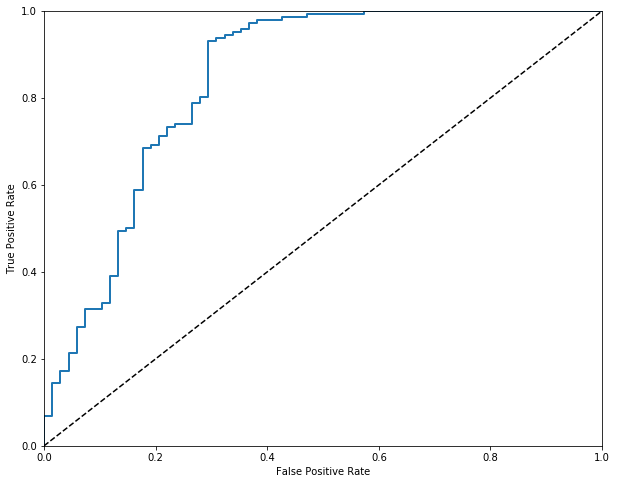

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc

probs = log_reg.predict_proba(x)
fpr, tpr, thresholds = roc_curve(ynew, probs[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under ROC =", np.round(roc_auc,4))

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Example of Softmax Regression Model

To illustrate the softmax regression, the same dataset as in the logistic regression is considered. But, we will consider the classification of 7 types of glasses. In this example, the observations of glasses are re-grouped into three types, namely, 1=building_windows type, 2=vechicle_windows type and 3=others.

In [10]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

glass = pd.read_csv("glass.data.csv", 
                    header=None,
                    names=["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass-type"])
glass = glass.drop("Id", axis=1)
varlist = list(glass.columns)
y = glass.iloc[:,len(varlist)-1]
x = glass.iloc[:,:len(varlist)-1]
y1 = (y == 1).astype(np.int) + (y == 2).astype(np.int)
y2 = (y == 3).astype(np.int)*2 + (y == 4).astype(np.int)*2
y3 = (y == 5).astype(np.int)*3 + (y == 6).astype(np.int)*3 + (y == 7).astype(np.int)*3
ynew = y1 + y2 + y3

softmaxreg = LogisticRegression(multi_class="multinomial", solver="newton-cg", C=1e10, max_iter=500)
soft_reg = softmaxreg.fit(x, ynew)
y_pred = soft_reg.predict(x)
accuracy = accuracy_score(ynew, y_pred)
print("Coefficients :", np.round(soft_reg.intercept_,4), np.round(soft_reg.coef_,4))
print("Accuracy =", np.round(accuracy,4))

Coefficients : [  221.9936  2776.2732 -2998.2668] [[ 1.1828950e+02 -3.9845000e+00 -3.3755000e+00 -6.1962000e+00
  -4.0093000e+00 -2.6650000e+00 -3.8849000e+00 -3.6381000e+00
   2.9345000e+00]
 [-1.4364831e+03 -4.4759000e+00 -1.4422000e+00 -7.2499000e+00
  -6.9941000e+00 -5.4237000e+00 -1.2616000e+00 -3.7577000e+00
   8.5160000e-01]
 [ 1.3181936e+03  8.4604000e+00  4.8177000e+00  1.3446100e+01
   1.1003400e+01  8.0887000e+00  5.1464000e+00  7.3958000e+00
  -3.7862000e+00]]
Accuracy = 0.8551


To further access the performance of softmax regression model, one may need to compute the correct classification rate of particular value of target value. For example, if we are interested in the correct classification of Y=1, one can select the observations with $Y=1$ and compute the percentage of correctly classified observations.

In [11]:
print("Correction Classification of Y=1:",np.round(np.sum(y_pred[ynew == 1] == 1)/np.sum(ynew == 1),4))
print("Correction Classification of Y=2:",np.round(np.sum(y_pred[ynew == 2] == 2)/np.sum(ynew == 2),4))
print("Correction Classification of Y=3:",np.round(np.sum(y_pred[ynew == 3] == 3)/np.sum(ynew == 3),4))

Correction Classification of Y=1: 0.9521
Correction Classification of Y=2: 0.0588
Correction Classification of Y=3: 0.8431


<div style="text-align: right"><a href="#top">Back to the top</a></div>

Furthermore, `statsmodels` package is also capable of performinng softmax regression.

In [12]:
import statsmodels.api as sm

xnew = sm.add_constant(x)
softreg = sm.MNLogit(ynew,xnew).fit()
print(softreg.summary())

Optimization terminated successfully.
         Current function value: 0.299331
         Iterations 13
                          MNLogit Regression Results                          
Dep. Variable:             glass-type   No. Observations:                  214
Model:                        MNLogit   Df Residuals:                      194
Method:                           MLE   Df Model:                           18
Date:                Tue, 19 Mar 2019   Pseudo R-squ.:                  0.6276
Time:                        11:14:24   Log-Likelihood:                -64.057
converged:                       True   LL-Null:                       -172.02
                                        LLR p-value:                 6.370e-36
glass-type=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2558.8616    738.609      3.464      0.001    1111.215    4006.508
RI           -1556.687

D:\anaconda3\envs\keras\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Note that in` statsmodels` package, alternative formulation of softmax regression model is considered. Specifcally, the first level ($Y=1$) in the target variable is chosen as the reference level. So, when the predicted $P(Y=2)$ (i.e. $\hat\mu_2$) and predicted $P(Y=3)$ (i.e. $\hat\mu_3$) are calculated, the predicted $P(Y=1)$ (i.e. $\hat\mu_1$)  is computed by $1-\hat\mu_2 - \hat\mu_3$.

<div style="text-align: right"><a href="#top">Back to the top</a></div>